In [1]:
### Import Libraries & Load Dataset

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [2]:
### Data Inspection

# Pixel range
print("Pixel range:", x_train.min(), "to", x_train.max())

# Unique labels
print("Unique labels:", np.unique(y_train))

Pixel range: 0.0 to 1.0
Unique labels: [0 1 2 3 4 5 6 7 8 9]


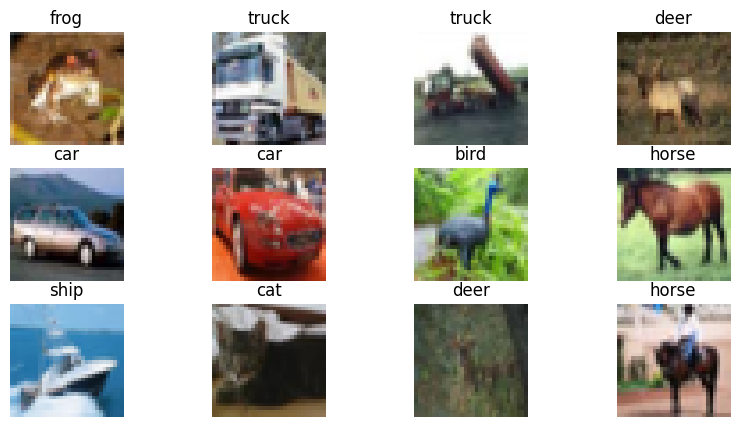

In [3]:
### Visualize Sample Images

plt.figure(figsize=(10,5))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

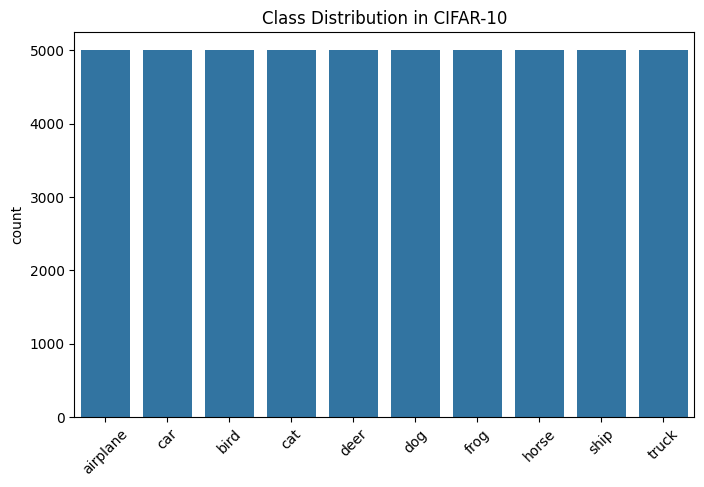

In [4]:
### Check Class Distribution

plt.figure(figsize=(8,5))
sns.countplot(x=y_train.flatten())
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Class Distribution in CIFAR-10")
plt.show()

In [5]:
### Baseline FCNN

fcnn = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fcnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history_fcnn = fcnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2792 - loss: 1.9998 - val_accuracy: 0.3828 - val_loss: 1.7129
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3865 - loss: 1.7016 - val_accuracy: 0.4189 - val_loss: 1.6242
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4260 - loss: 1.6092 - val_accuracy: 0.4387 - val_loss: 1.5805
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4487 - loss: 1.5458 - val_accuracy: 0.4580 - val_loss: 1.5205
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4597 - loss: 1.5054 - val_accuracy: 0.4542 - val_loss: 1.5307


In [6]:
### Basic CNN

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history_cnn = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3492 - loss: 1.7608 - val_accuracy: 0.5377 - val_loss: 1.2732
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5800 - loss: 1.1812 - val_accuracy: 0.6248 - val_loss: 1.0539
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6400 - loss: 1.0203 - val_accuracy: 0.6540 - val_loss: 0.9684
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6757 - loss: 0.9131 - val_accuracy: 0.6765 - val_loss: 0.9185
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7123 - loss: 0.8164 - val_accuracy: 0.6897 - val_loss: 0.8995
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7350 - loss: 0.7550 - val_accuracy: 0.7052 - val_loss: 0.8462
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7605 - loss: 0.6820 - val_accuracy: 0.7013 - val_loss: 0.8660
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7768 - loss: 0.636

In [7]:
### Improved CNN (BatchNorm + Augmentation)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

cnn_improved = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_improved.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_cnn_improved = cnn_improved.fit(datagen.flow(x_train, y_train, batch_size=64),
                                        epochs=20,
                                        validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.3899 - loss: 1.8974 - val_accuracy: 0.5721 - val_loss: 1.2264
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6019 - loss: 1.1337 - val_accuracy: 0.5792 - val_loss: 1.2443
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.6593 - loss: 0.9817 - val_accuracy: 0.6770 - val_loss: 0.9078
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6877 - loss: 0.8951 - val_accuracy: 0.6956 - val_loss: 0.9121
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7075 - loss: 0.8463 - val_accuracy: 0.6887 - val_loss: 0.9475
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7251 - loss: 0.7943 - val_accuracy: 0.6866 - val_loss: 0.9661
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7373 - loss: 0.7588 - val_accuracy: 0.7664 - val_loss: 0.6745
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7510 - loss: 0.7250 - val_accurac

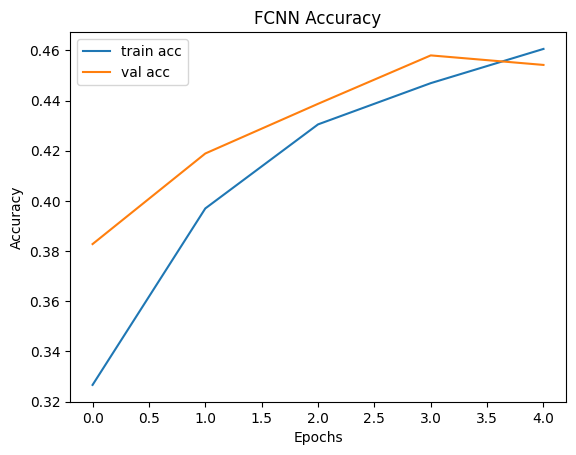

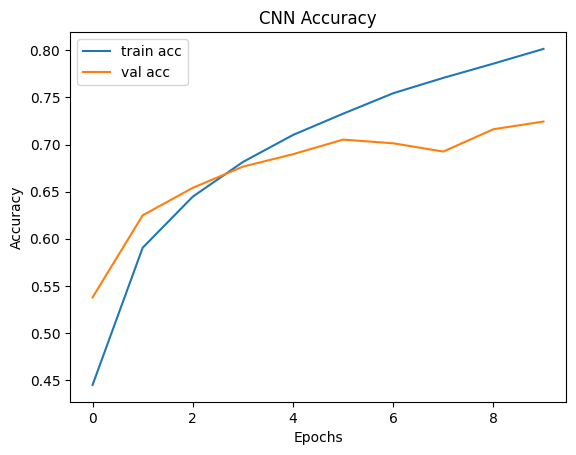

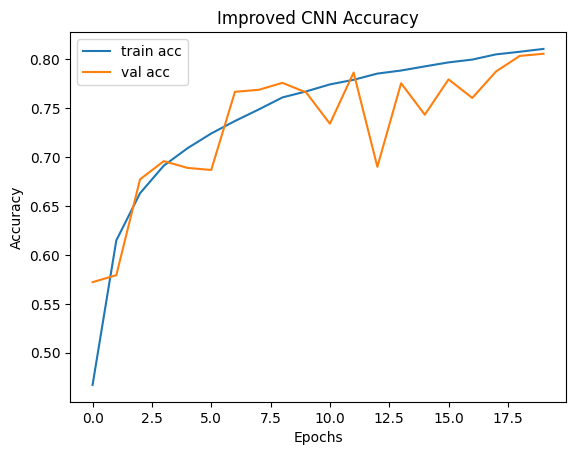

In [8]:
### Training Curves

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_fcnn, "FCNN Accuracy")
plot_history(history_cnn, "CNN Accuracy")
plot_history(history_cnn_improved, "Improved CNN Accuracy")

In [9]:
### Evaluation

# Evaluate Improved CNN
test_loss, test_acc = cnn_improved.evaluate(x_test, y_test, verbose=2)
print("Final Test Accuracy (Improved CNN):", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8052 - loss: 0.5780
Final Test Accuracy (Improved CNN): 0.8051999807357788


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


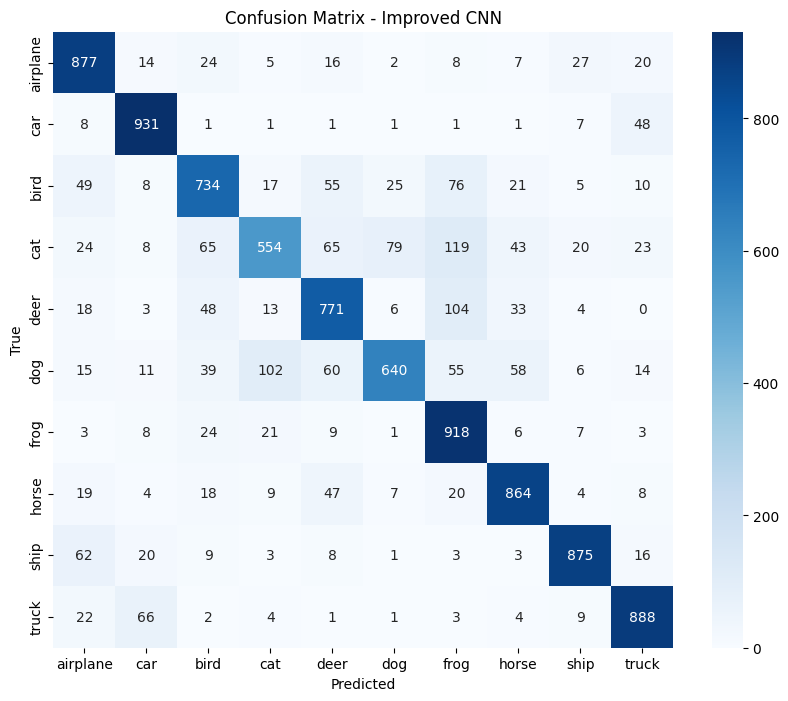

In [10]:
### Confusion Matrix

# Predictions
y_pred = cnn_improved.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Improved CNN")
plt.show()

In [11]:
### Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.88      0.84      1000
         car       0.87      0.93      0.90      1000
        bird       0.76      0.73      0.75      1000
         cat       0.76      0.55      0.64      1000
        deer       0.75      0.77      0.76      1000
         dog       0.84      0.64      0.73      1000
        frog       0.70      0.92      0.80      1000
       horse       0.83      0.86      0.85      1000
        ship       0.91      0.88      0.89      1000
       truck       0.86      0.89      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



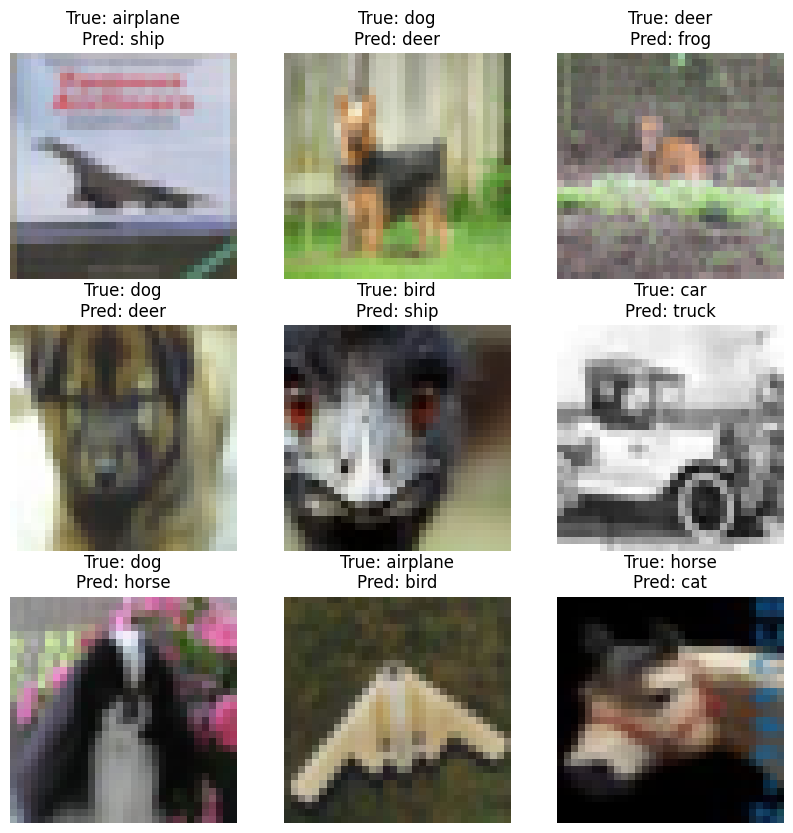

In [12]:
### Misclassified Samples

misclassified_idx = np.where(y_pred_classes != y_test.flatten())[0]

plt.figure(figsize=(10,10))
for i in range(9):
    idx = misclassified_idx[i]
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis("off")
plt.show()

In [13]:
### Final Comparison

models_acc = {
    "FCNN": history_fcnn.history['val_accuracy'][-1],
    "Basic CNN": history_cnn.history['val_accuracy'][-1],
    "Improved CNN": history_cnn_improved.history['val_accuracy'][-1]
}

print("Model Comparison:", models_acc)

Model Comparison: {'FCNN': 0.45419999957084656, 'Basic CNN': 0.724399983882904, 'Improved CNN': 0.8051999807357788}


In [14]:
### Save & Load Trained Model

# Save the improved CNN model in HDF5 format
cnn_improved.save("cifar10_cnn_improved.h5")
print("✅ Model saved as cifar10_cnn_improved.h5")

✅ Model saved as cifar10_cnn_improved.h5


In [15]:
### Load Model

# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model("cifar10_cnn_improved.h5")
print("✅ Model loaded successfully!")

# Verify accuracy
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Reloaded model accuracy: {acc:.4f}")

✅ Model loaded successfully!
Reloaded model accuracy: 0.8052


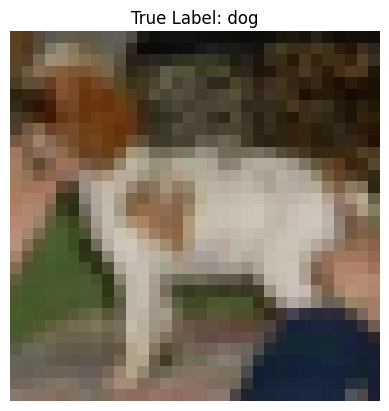

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
Predicted Label: dog


In [16]:
### Make Predictions with Loaded Model

# Predict on one sample
sample_idx = 12
sample_image = x_test[sample_idx]
plt.imshow(sample_image)
plt.axis("off")
plt.title("True Label: " + class_names[y_test[sample_idx][0]])
plt.show()

# Expand dimensions (model expects batch input)
sample_pred = loaded_model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(sample_pred)

print("Predicted Label:", class_names[predicted_class])